 Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


Step 1: Load the dataset

In [3]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

Step 2: Select relevant features and rename the target column

In [4]:
df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df.rename(columns={'Survived': 'Creditworthy'}, inplace=True)


Step 3: Handle missing values

In [7]:
df['Age'].fillna(df['Age'].median())


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Step 4: Split features and target

In [8]:
X = df.drop('Creditworthy', axis=1)
y = df['Creditworthy']

Step 5: Standardize the feature values

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 6: Split the data into training and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Step 7: Train the model (Random Forest)

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 Step 8: Make predictions

In [12]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


Step 9: Evaluate the model

In [15]:
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))
print("🔁 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
roc_score = roc_auc_score(y_test, y_prob)
print(f"🔥 ROC-AUC Score: {roc_score:.2f}")



📊 Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.68      0.61      0.64        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.71       179
weighted avg       0.72      0.72      0.72       179

🔁 Confusion Matrix:

[[84 21]
 [29 45]]
🔥 ROC-AUC Score: 0.78


Step 10: Plot ROC Curve

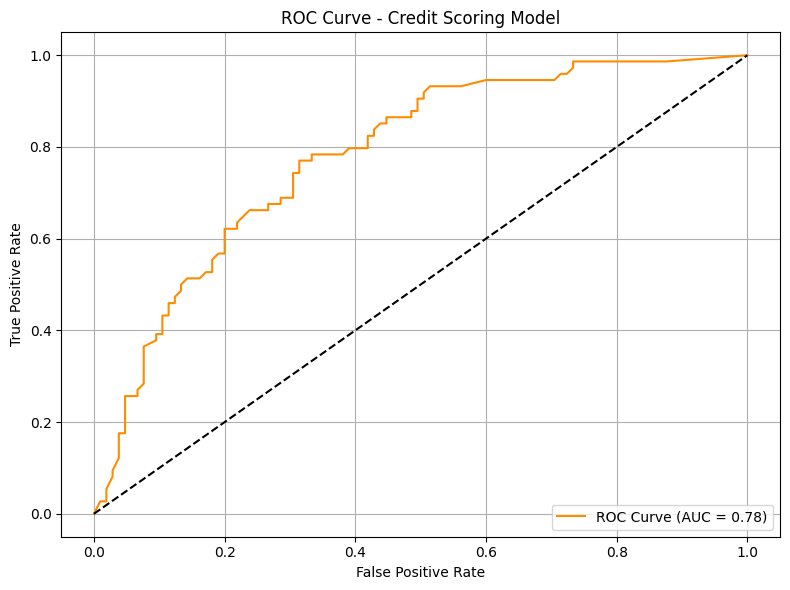

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Scoring Model")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()